In [72]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer




In [73]:
#1. Load the training and testing dataset provided with this lab and join the Kaggle competition.
trainingdataset = pd.read_csv("C:/Users/aksha/Downloads/Studies/CMPE-257/lab - 1/cmpe-257-lab-1-spring-2022/x_train.csv")
targetdataset = pd.read_csv("C:/Users/aksha/Downloads/Studies/CMPE-257/lab - 1/cmpe-257-lab-1-spring-2022/y_train.csv")
#X = trainingdataset.iloc[:, :].values
#Y = targetdataset.iloc[:, -1].values

trainingdataset.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14368 entries, 0 to 14367
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   14368 non-null  int64  
 1   city                    14368 non-null  object 
 2   city_development_index  14368 non-null  float64
 3   gender                  10975 non-null  object 
 4   relevent_experience     14368 non-null  object 
 5   enrolled_university     14076 non-null  object 
 6   education_level         14030 non-null  object 
 7   major_discipline        12279 non-null  object 
 8   experience              14323 non-null  object 
 9   company_size            9938 non-null   object 
 10  company_type            9770 non-null   object 
 11  last_new_job            14041 non-null  object 
 12  training_hours          14368 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 1.4+ MB


2. Explain in your own words what is NOIR classification of data. (2 points)

NOIR Classification : 

There for 4 types of NOIR classificiation : 
1)Nominal data refers to data which can be organised into categories e.g. gender: men and women, type of pet: cat, dog, fish, etc. Nominal data does not refer to numbers or quantities. You can’t divide a dog by 2 (or at least you shouldn’t).
2)Ordinal data refers to data which can be put into an order or ranked. Individual items can be organised by importance, general size or some arbitrary preference. Ordinal data ignores the exact degree of difference between individual ranked items.
3)Cardinal data (also known as interval data) refers to data comprised of consistent units/intervals. Higher numbers mean more of something whereas lower numbers always mean less of something e.g. height, weight, time, temperature, etc.
4)Ratio data refers to data which can be ranked, has consistent units and has a true zero e.g. age. Some statistics software packages may refer to cardinal and ratio data as ‘scale’.



3. Classify the given dataset features into NOIR categories. (2 points)
Nominal 
 1   city                    
 2   gender                   
 3   relevent_experience     
 4   enrolled_university      
 5   education_level         
 6   major_discipline                  
 7   company_type    
 8   experience
 
 Ordinal:
 
 1)last_new_job
 2)training_hours
 
 Ratio:
 
 1)city_development_index
 
 Cardinal(interval):
 
 1)company_size
 
 
 


4. Summarize the dataset: (10 points)
a. Number of columns and rows present (1 point)
b. Min, max, avg, std dev etc. stats for continuous features (hint: use pandas describe 
function) (1 point)
c. Number of unique values for categorical features (1 point)
d. Number of nulls and Nans in each column (1 point)
e. Visualize distribution of each feature using graphs (6 points)

In [74]:
#4.a.1
print(trainingdataset.shape)


(14368, 13)


In [75]:
#4.a.2
print(targetdataset.shape)

(14368, 2)


In [76]:
#4.b
trainingdataset.describe()


,index,city_development_index,training_hours
count,14368.000000,14368.000000,14368.000000
mean,9634.231765,0.828252,65.396645
std,5522.764568,0.123419,60.277583
min,0.000000,0.448000,1.000000
25%,4840.750000,0.738000,23.000000
50%,9693.500000,0.899000,47.000000
75%,14405.250000,0.920000,88.000000
max,19157.000000,0.949000,336.000000


In [77]:
#4.c
print('Number of unique values in gender : ',trainingdataset['gender'].nunique())
print('Number of unique values in city : ',trainingdataset['city'].nunique())
print('Number of unique values in relevent_experience : ',trainingdataset['relevent_experience'].nunique())
print('Number of unique values in enrolled_university : ',trainingdataset['enrolled_university'].nunique())
print('Number of unique values in education_level : ',trainingdataset['education_level'].nunique())
print('Number of unique values in major_discipline : ',trainingdataset['major_discipline'].nunique())
print('Number of unique values in company_size : ',trainingdataset['company_size'].nunique())
print('Number of unique values in company_type : ',trainingdataset['company_type'].nunique())
print('Number of unique values in experience : ',trainingdataset['experience'].nunique())

Number of unique values in gender :  3
Number of unique values in city :  123
Number of unique values in relevent_experience :  2
Number of unique values in enrolled_university :  3
Number of unique values in education_level :  5
Number of unique values in major_discipline :  6
Number of unique values in company_size :  8
Number of unique values in company_type :  6
Number of unique values in experience :  22


In [78]:
#4.d
trainingdataset.isna().sum()


index                        0
city                         0
city_development_index       0
gender                    3393
relevent_experience          0
enrolled_university        292
education_level            338
major_discipline          2089
experience                  45
company_size              4430
company_type              4598
last_new_job               327
training_hours               0
dtype: int64

C:\Users\aksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='city', ylabel='count'>

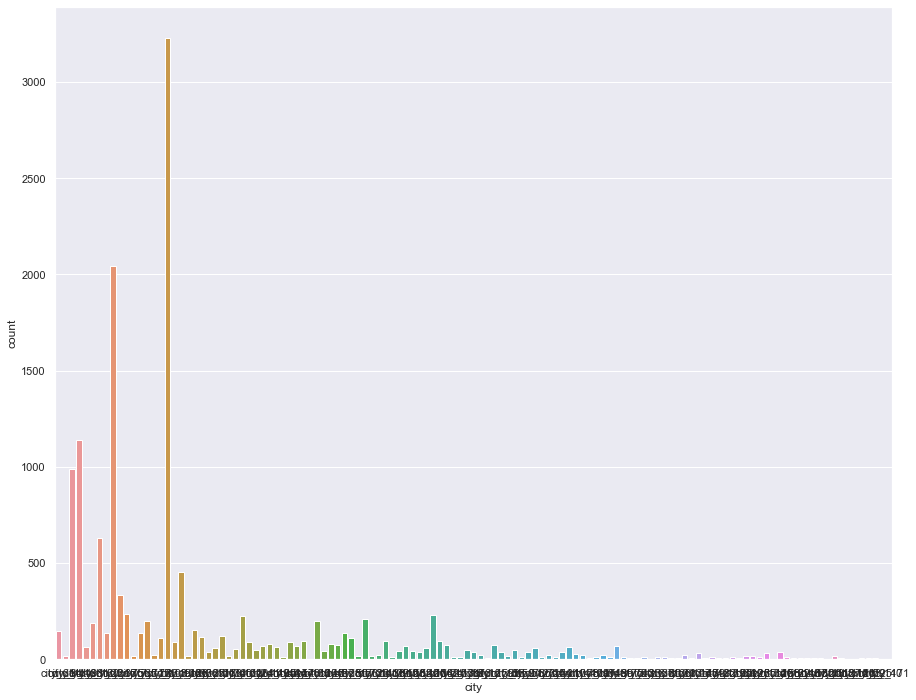

In [85]:
#4.e
trainingdataset.columns
sns.countplot(trainingdataset.city)
#observation : 

C:\Users\aksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

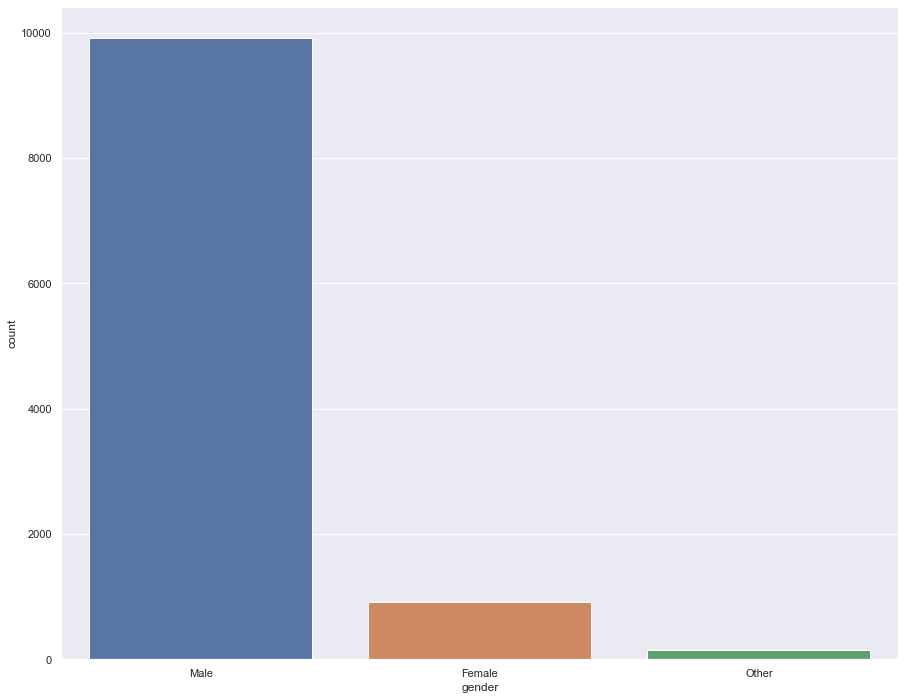

In [86]:
trainingdataset.columns
sns.countplot(trainingdataset.gender)

C:\Users\aksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='relevent_experience', ylabel='count'>

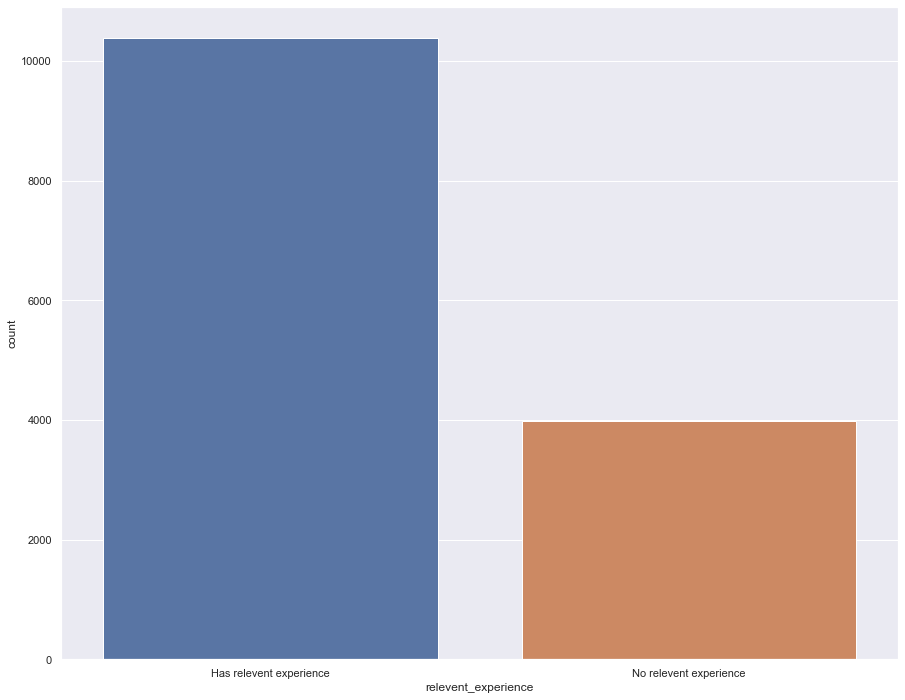

In [87]:
trainingdataset.columns
sns.countplot(trainingdataset.relevent_experience)

C:\Users\aksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='enrolled_university', ylabel='count'>

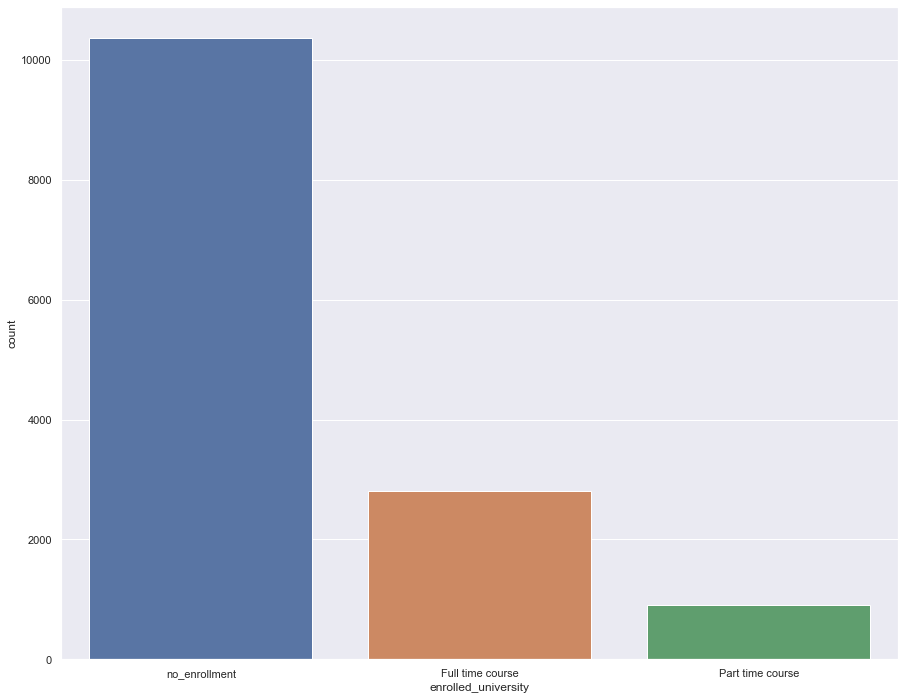

In [88]:
trainingdataset.columns
sns.countplot(trainingdataset.enrolled_university)

C:\Users\aksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education_level', ylabel='count'>

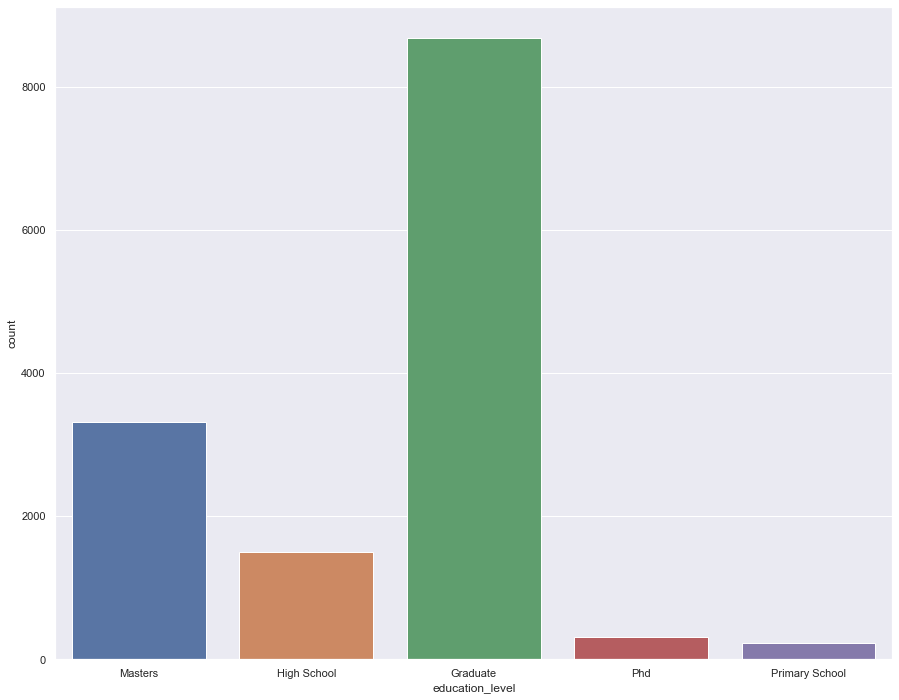

In [89]:
trainingdataset.columns
sns.countplot(trainingdataset.education_level)

C:\Users\aksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='major_discipline', ylabel='count'>

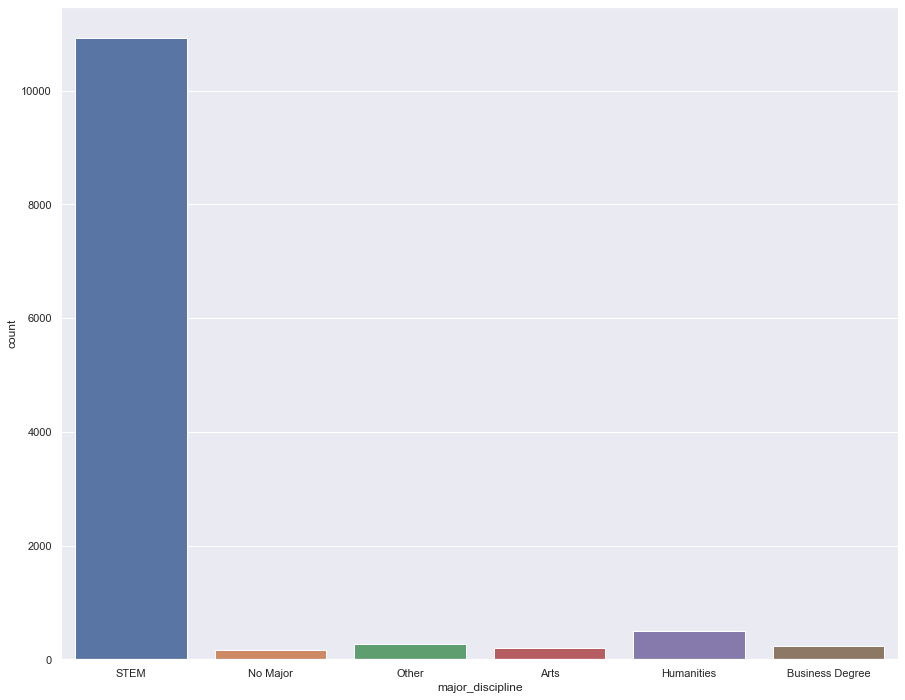

In [90]:
trainingdataset.columns
sns.countplot(trainingdataset.major_discipline)

C:\Users\aksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='company_type', ylabel='count'>

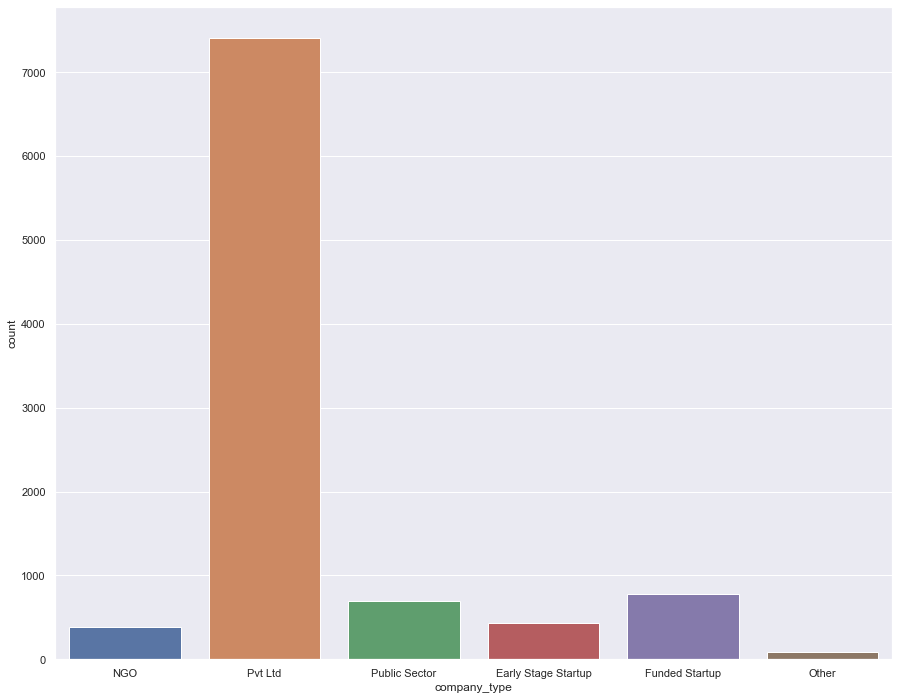

In [91]:
trainingdataset.columns
sns.countplot(trainingdataset.company_type)

C:\Users\aksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='experience', ylabel='count'>

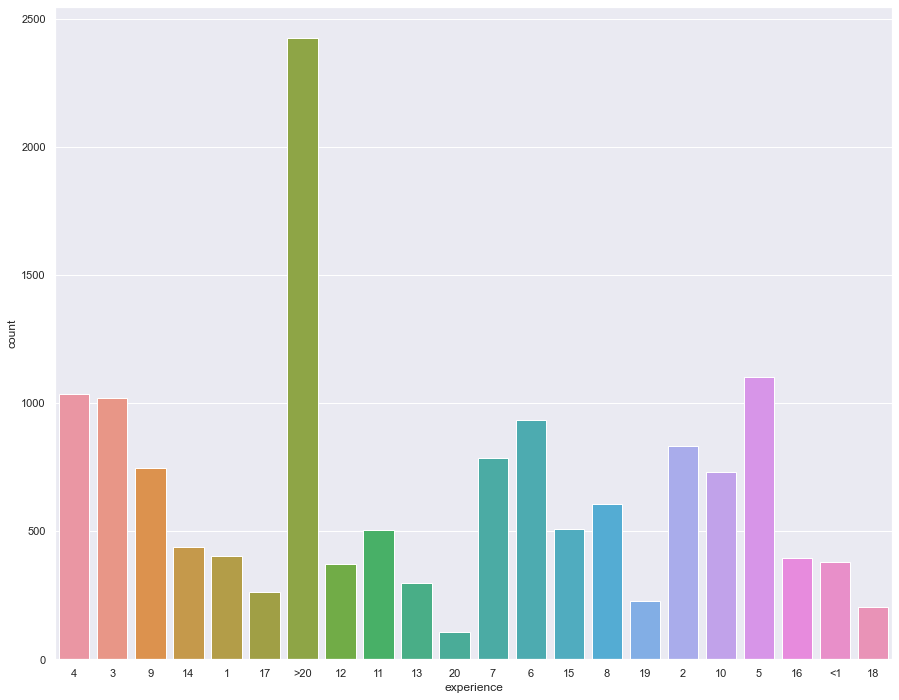

In [92]:
trainingdataset.columns
sns.countplot(trainingdataset.experience)

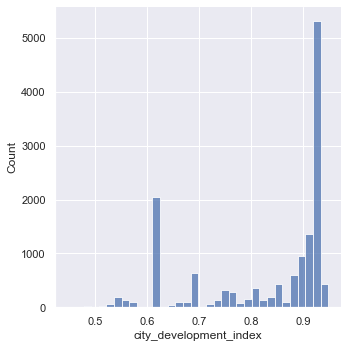

In [99]:
trainingdataset.columns
sns.displot(trainingdataset.city_development_index)

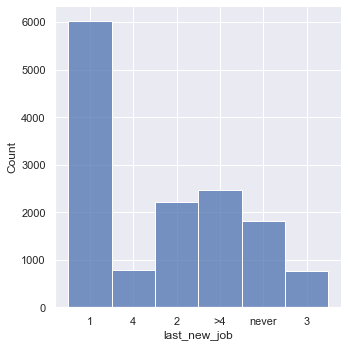

In [100]:
trainingdataset.columns
sns.displot(trainingdataset.last_new_job)

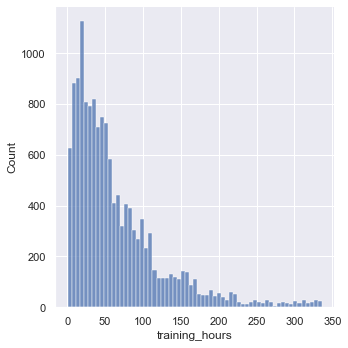

In [101]:
trainingdataset.columns
sns.displot(trainingdataset.training_hours)

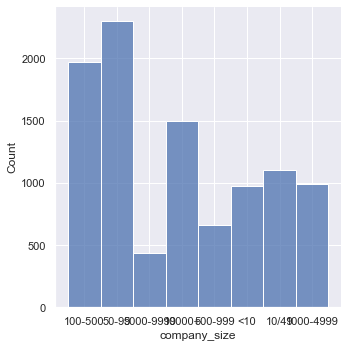

In [102]:
trainingdataset.columns
sns.displot(trainingdataset.company_size)

In [ ]:
#5
#sns.set(rc={'figure.figsize':(:,12)})
#sns.distplot(trainingdataset['trainingdataset'] , bins=30)
#plt.show()

In [107]:
imputer = SimpleImputer(missing_values=np.nan,strategy = 'mean')
imputer.fit(trainingdataset.loc[:,'last_new_job'])
#trainingdataset[:,:] = imputer.transform(trainingdataset[:,:])
#trainingdataset.isna().sum()

ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: '>4'